# РГР, Вальчевський Павло, ОІ-21сп
# Було обрану таку вибірку з Kaggle
https://www.kaggle.com/code/abdelrhmanyoussef/uae-realstate/input
Цей датасет містить інформацію про оренду нерухомості в ОАЕ + адресу, кількість спалень, ванних кімнат, тип нерухомості, площу, категорію оренди, ціну за квадратний метр та інші ознаки. Це відноситься до задачі регресії, оскільки можна прогнозувати орендну плату на основі різних змінних. Ось список цих стовпців з перекладом для розуміння:
 - Address Адреса
 - Rent Оренда
 - Beds Ліжка
 - Baths Ванни
 - Type Тип
 - Area_in_sqft Площа в кв м
 - Rent_per_sqft Оренда за кв м
 - Rent_category Оренда категорія
 - Frequency Періодичність
 - Furnishing Меблювання
 - Purpose Призначення
 - Posted_date Дата опублікування
 - Age_of_listing_in_days  Час викристання в днях
 - Location Місцезнаходження
 - City Місто
 - Latitude Широта
 - Longitude Довготаongitude Довгота
# Бізнес-проблема:
Задача, що можна вирішуєшться за допомогою цього датасету, полягає в прогнозуванні вартості оренди нерухомості (Rent) на основі різних характеристик, таких як: Beds  Baths Type  Area_in_sqft  Rent_per_sqft Rent_category Furnishing  Age_of_listing_in_days  City  Latitude  Longitude


In [727]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

warnings.filterwarnings("ignore") # Ігнорування попереджень

In [728]:
data = pd.read_csv('dubai_properties.csv') # Завантаження даних

# Аналіз даних і визначення даних, що є важливими для моделювання
- Було визначено числові, категоріальні стовпці (потрібні і не потрібні для моделі).
- Дані є однаковими для стовпців Purpose i Frequence, а інші дані, що є унікальними для кожного запису (Адреса тощо) будуть заважати під час навчання моделі.
- Було визначено, що такі дані будуть використовуватись для подальшого навчання і прогнозування моделі: Beds  Baths Type  Area_in_sqft  Rent_per_sqft Rent_category Furnishing  Age_of_listing_in_days  City  Latitude  Longitude
- Було побудовано гістограми (кількість до значення стовпця)
- Було побудовано коробчасті графіки (для перегляду медіани та точок викиду)
- Було побудовано кореляційну матрицю, де зображено (взаємозв'язок між усіма характеристиками)

In [730]:
data.head(3) # Виивід перших 3 записів

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,07/03/2024,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,08/03/2024,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,21/03/2024,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939


In [731]:
data.shape # Кількість записів і атрибутів (стовпців)

(73742, 17)

In [732]:
data.columns # Вивід стовпців

Index(['Address', 'Rent', 'Beds', 'Baths', 'Type', 'Area_in_sqft',
       'Rent_per_sqft', 'Rent_category', 'Frequency', 'Furnishing', 'Purpose',
       'Posted_date', 'Age_of_listing_in_days', 'Location', 'City', 'Latitude',
       'Longitude'],
      dtype='object')

In [733]:
data.info() # Іформація про датасет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

In [734]:
for column in data.columns: # Виведення унікальних значень і кількіості для кожного стовпця
    print(f"Значення в стовпці '{column}' і їх кількість:")
    print(data[column].value_counts(), end="\n" + "=" * 75 + "\n")

Значення в стовпці 'Address' і їх кількість:
Address
Khalifa City, Abu Dhabi                              2300
Mohammed Bin Zayed City, Abu Dhabi                   1293
Madinat Al Riyadh, Abu Dhabi                          767
Muwaileh 3 Building, Muwailih Commercial, Sharjah     762
Muwaileh Building, Muwailih Commercial, Sharjah       713
                                                     ... 
Building 188, Mogul, Discovery Gardens, Dubai           1
Maeen 1, Maeen, The Lakes, Dubai                        1
Acuna, DAMAC Hills 2 (Akoya by DAMAC), Dubai            1
Kappa Acca 3, Dubai South, Dubai                        1
Al Huboob 1, Al Salamah, Umm Al Quwain                  1
Name: count, Length: 4515, dtype: int64
Значення в стовпці 'Rent' і їх кількість:
Rent
120000     1681
150000     1645
75000      1630
110000     1569
85000      1476
           ... 
246000        1
489750        1
799990        1
1220000       1
48997         1
Name: count, Length: 2099, dtype: int64
Значен

In [735]:
data.duplicated().sum() # Кількість записів, що дублюються

0

In [736]:
data.isnull().sum() # Кількість нульових значень для кожного стовпця

Address                     0
Rent                        0
Beds                        0
Baths                       0
Type                        0
Area_in_sqft                0
Rent_per_sqft               0
Rent_category               0
Frequency                   0
Furnishing                  0
Purpose                     0
Posted_date                 0
Age_of_listing_in_days      0
Location                    0
City                        0
Latitude                  719
Longitude                 719
dtype: int64

In [737]:
data.describe() # Статистика для числових стовпців

,Rent,Beds,Baths,Area_in_sqft,Rent_per_sqft,Age_of_listing_in_days,Latitude,Longitude
count,7.374200e+04,73742.000000,73742.000000,73742.000000,73742.000000,73742.000000,73023.000000,73023.000000
mean,1.479250e+05,2.162811,2.650213,2054.053552,88.057754,74.261547,24.918929,55.053133
std,3.069658e+05,1.578155,1.632997,3003.919252,66.534400,72.346767,0.569356,0.653722
min,0.000000e+00,0.000000,1.000000,74.000000,0.000000,11.000000,15.175847,43.351928
25%,5.499900e+04,1.000000,2.000000,850.000000,39.977778,30.000000,24.493598,54.607372
50%,9.800000e+04,2.000000,2.000000,1334.000000,71.428571,52.000000,25.078641,55.238209
75%,1.700000e+05,3.000000,3.000000,2130.000000,118.483412,95.000000,25.197978,55.367138
max,5.500000e+07,12.000000,11.000000,210254.000000,2182.044888,2276.000000,25.920310,56.361294


In [738]:
numerical_columns = [col for col in data.columns if data[col].dtype in ['int64', 'float64']] # Числові стовпці
categorical_columns = [col for col in data.columns if col not in numerical_columns] # Категоріальні стовпці
special_categorical_columns = ['Type', 'Rent_category', 'Furnishing', 'City'] # Категоріальні стовпці для роботи
deleted_categorial_columns = [col for col in categorical_columns if col not in special_categorical_columns] # Категоріальні, що непотрібні для роботи
def plot_hist(df): # Гістограми числових стовпців
    df.hist(bins=20, figsize=(14, 10))
    plt.suptitle("Гістограми числових стовпців", fontsize=20, y=1.05)
    plt.show()
def plot_boxplot(df, num_col): # Коробчасті графіки числових стовпців
    rows = int((len(num_col) - 1) / 3) + 1
    cols = 3
    plt.figure(figsize=(15, 8))
    plt.suptitle("Коробчасті графіки числових стовпців", fontsize=20, y=1.05)
    for i, column in enumerate(num_col, 1):
        plt.subplot(rows, cols, i) 
        sns.boxplot(df[column])
        plt.title(f'Box Plot for {column}')
    plt.tight_layout()
    plt.show()
def plot_corr_matrix(df, num_col): # Кореляційна матриця
    numeric_data = df[num_col]
    plt.figure(figsize=(12, 10))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='viridis', linewidths=0.6, annot_kws={'size': 8}, fmt='.2f')
    plt.title("Кореляційна матриця")
    plt.xlabel('Особливість')
    plt.ylabel('Особливість')
    plt.show()
def plot_count_cat_col(df, cat_col): # Гістограми для категоріальних стовпців
    for col in cat_col:
        plt.figure(figsize=(12, 4))
        sns.countplot(data=df, x=col)
        plt.title(f"Розподіл за {col}")
        plt.xticks(rotation=90)
        plt.show()

In [739]:
print("Числові стовпці:", numerical_columns)
print("Категоріальні стовпці:", categorical_columns)
print("Категоріальні стовпці, що будуть використовуватись для навчання моделі:", special_categorical_columns)
print("Категоріальні стовпці, що не будуть використовуватись для навчання моделі:", deleted_categorial_columns)

Числові стовпці: ['Rent', 'Beds', 'Baths', 'Area_in_sqft', 'Rent_per_sqft', 'Age_of_listing_in_days', 'Latitude', 'Longitude']
Категоріальні стовпці: ['Address', 'Type', 'Rent_category', 'Frequency', 'Furnishing', 'Purpose', 'Posted_date', 'Location', 'City']
Категоріальні стовпці, що будуть використовуватись для навчання моделі: ['Type', 'Rent_category', 'Furnishing', 'City']
Категоріальні стовпці, що не будуть використовуватись для навчання моделі: ['Address', 'Frequency', 'Purpose', 'Posted_date', 'Location']


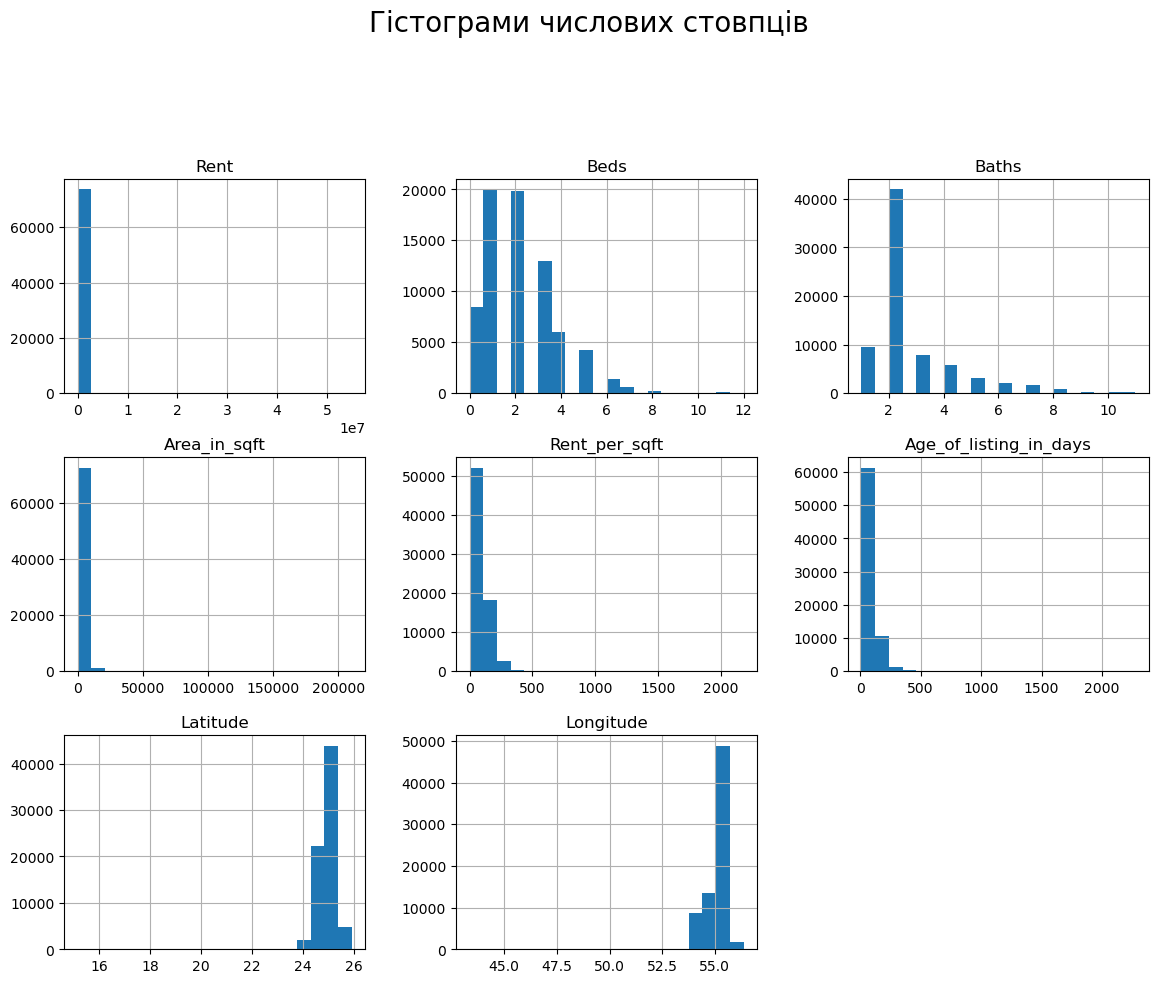

In [740]:
plot_hist(data)

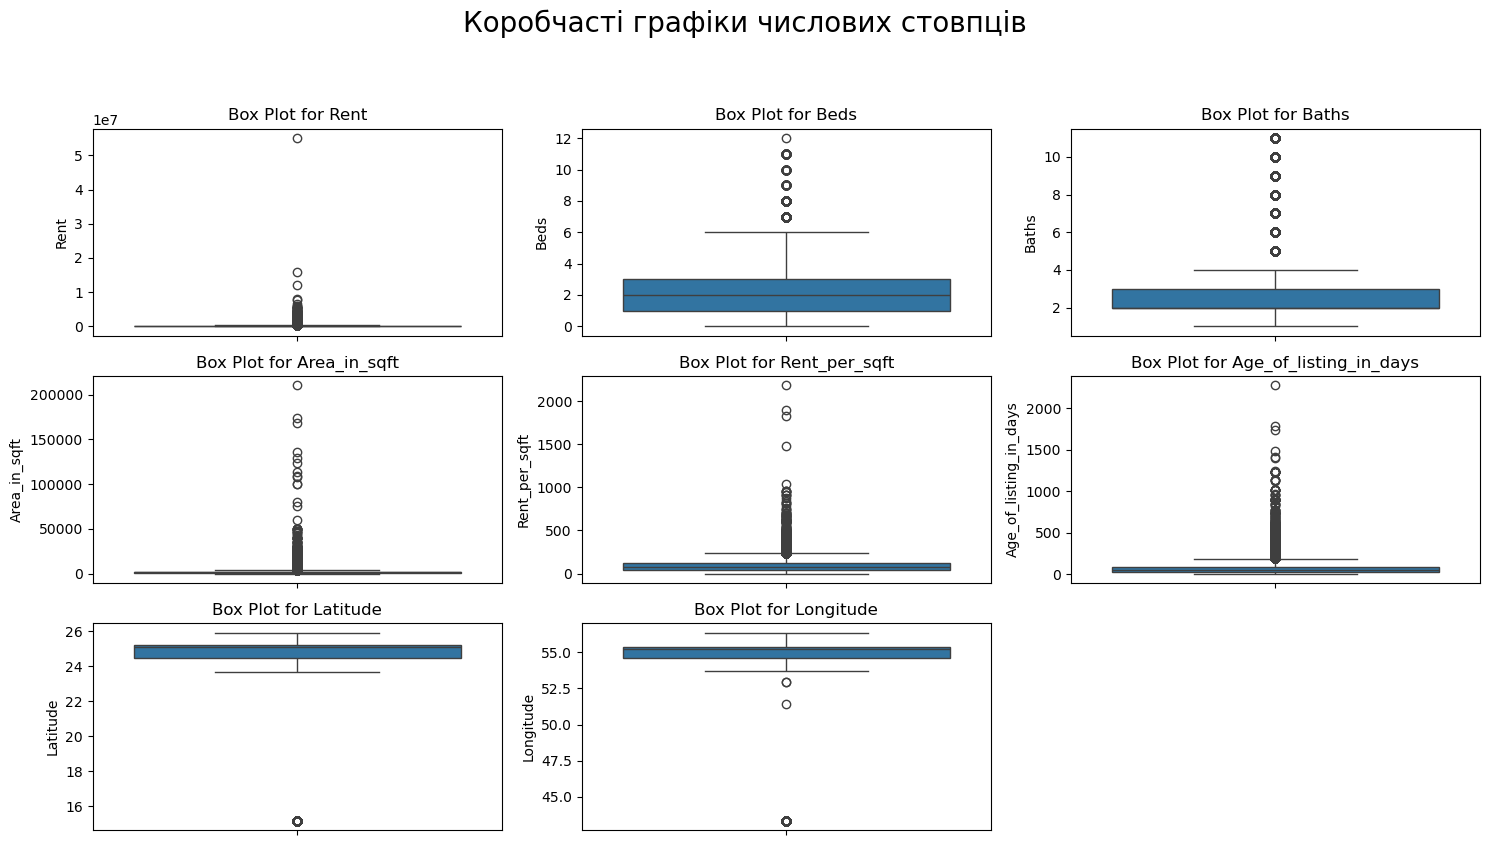

In [741]:
plot_boxplot(data, numerical_columns)

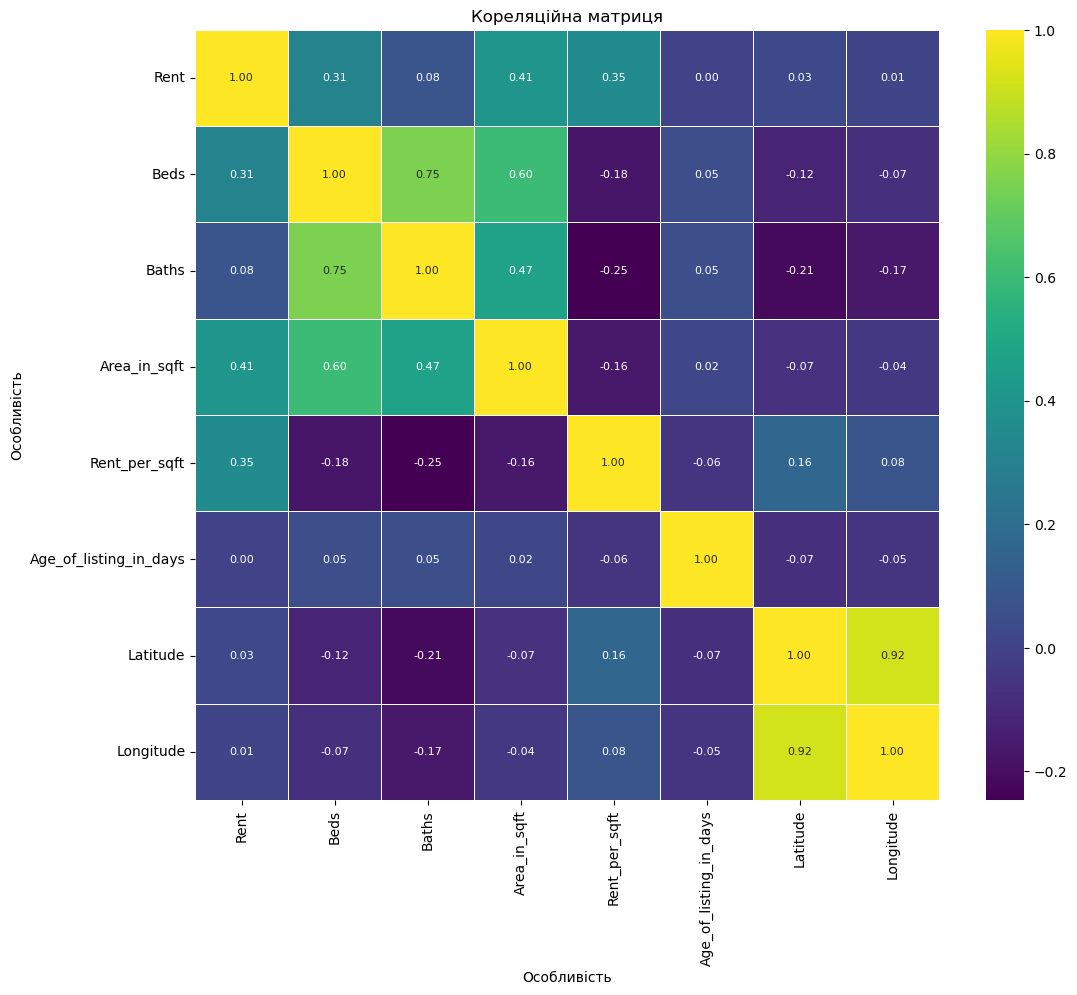

In [742]:
plot_corr_matrix(data, numerical_columns)

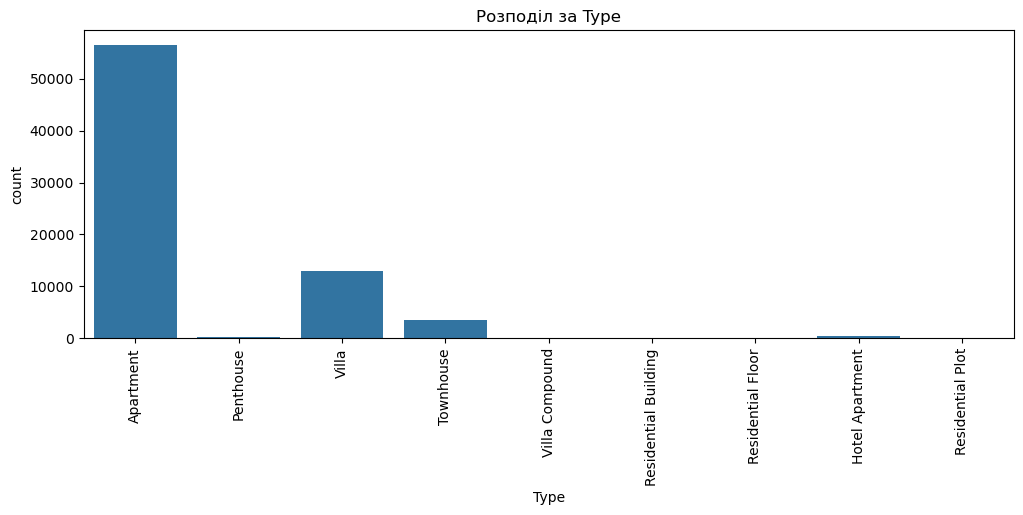

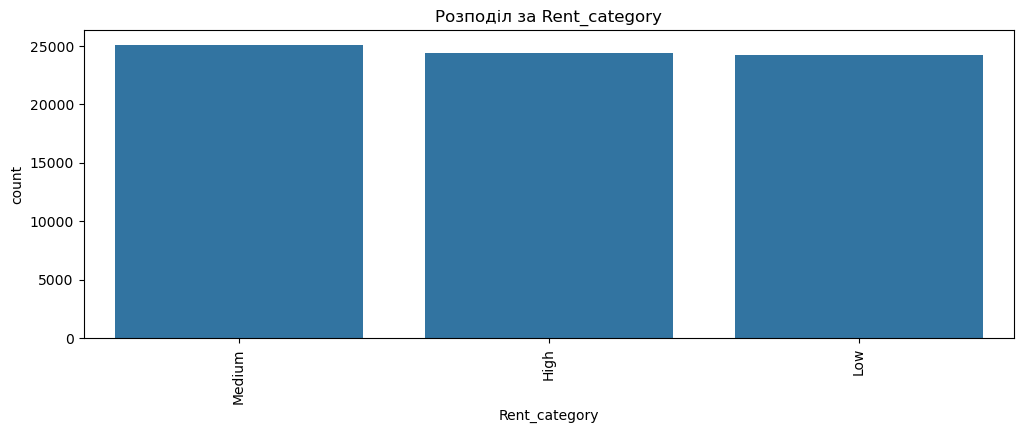

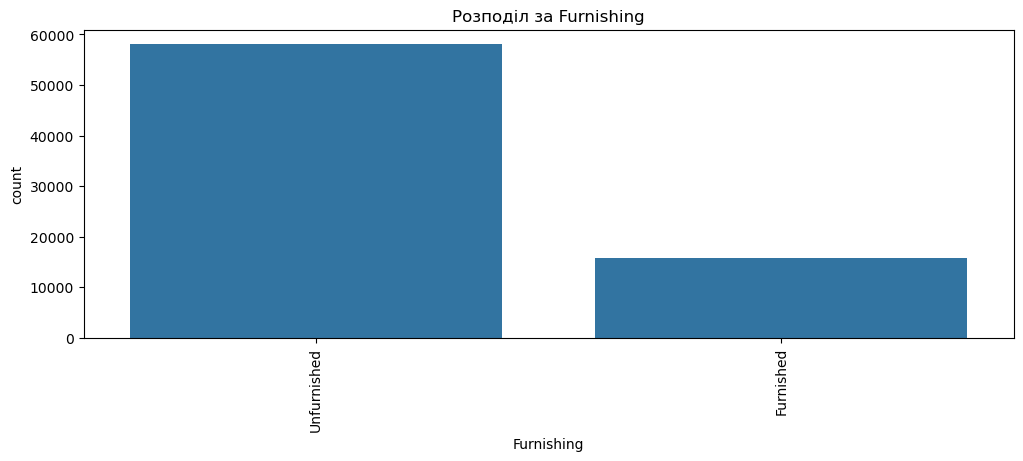

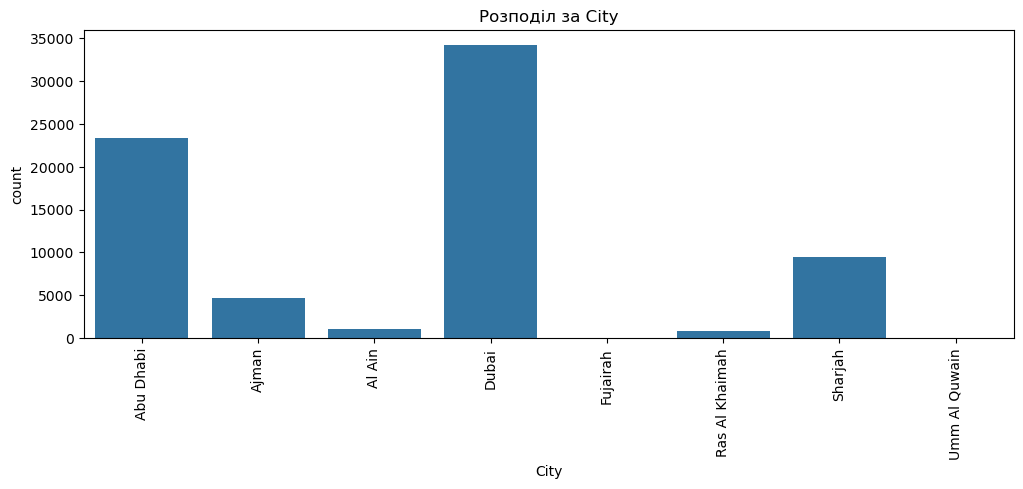

In [743]:
plot_count_cat_col(data, special_categorical_columns)

# Обробка даних (нульових значень, ідентичних значень, відхилень, кодування категоріальних даних)
- Було заповнено пропущені значення для стовпців Latitude i Longitude - медіаною
- Відхилення було опрацьовано за допомогою Міжквартального розмаху (IQR)
- Видалено не потрібні стовпці
- Збережено та закодовано оброблені дані
- Було побудовано гістограми (кількість до значення стовпця) з опрацьованими даними
- Було побудовано коробчасті графіки (для перегляду медіани та точок викиду) з опрацьованими даними
- Було побудовано кореляційну матрицю, де зображено (взаємозв'язок між усіма характеристиками) з опрацьованими даними

In [745]:
def clean_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
def clean_null(df, column):
    median = df[column].median()
    df[column].fillna(median, inplace=True)
    return df
data = clean_null(data, 'Latitude')
data = clean_null(data, 'Longitude')
for col in numerical_columns:
    data = clean_outliers(data, col)
for col in deleted_categorial_columns:
    data.drop(col, axis=1, inplace=True)

In [746]:
data.isnull().sum() # Повторний перегляд кількості нульових значень для кожного стовпця

Rent                      0
Beds                      0
Baths                     0
Type                      0
Area_in_sqft              0
Rent_per_sqft             0
Rent_category             0
Furnishing                0
Age_of_listing_in_days    0
City                      0
Latitude                  0
Longitude                 0
dtype: int64

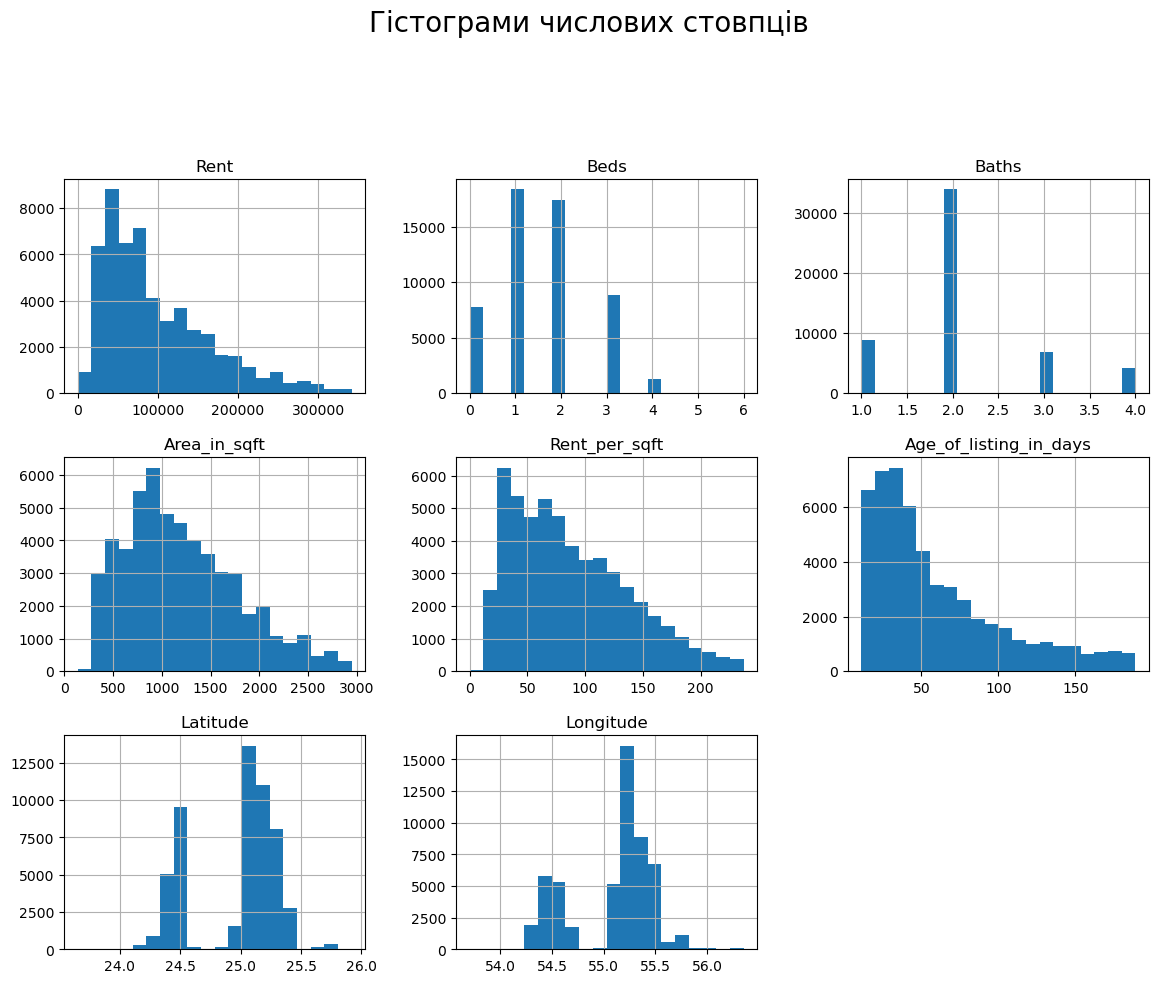

In [747]:
plot_hist(data)

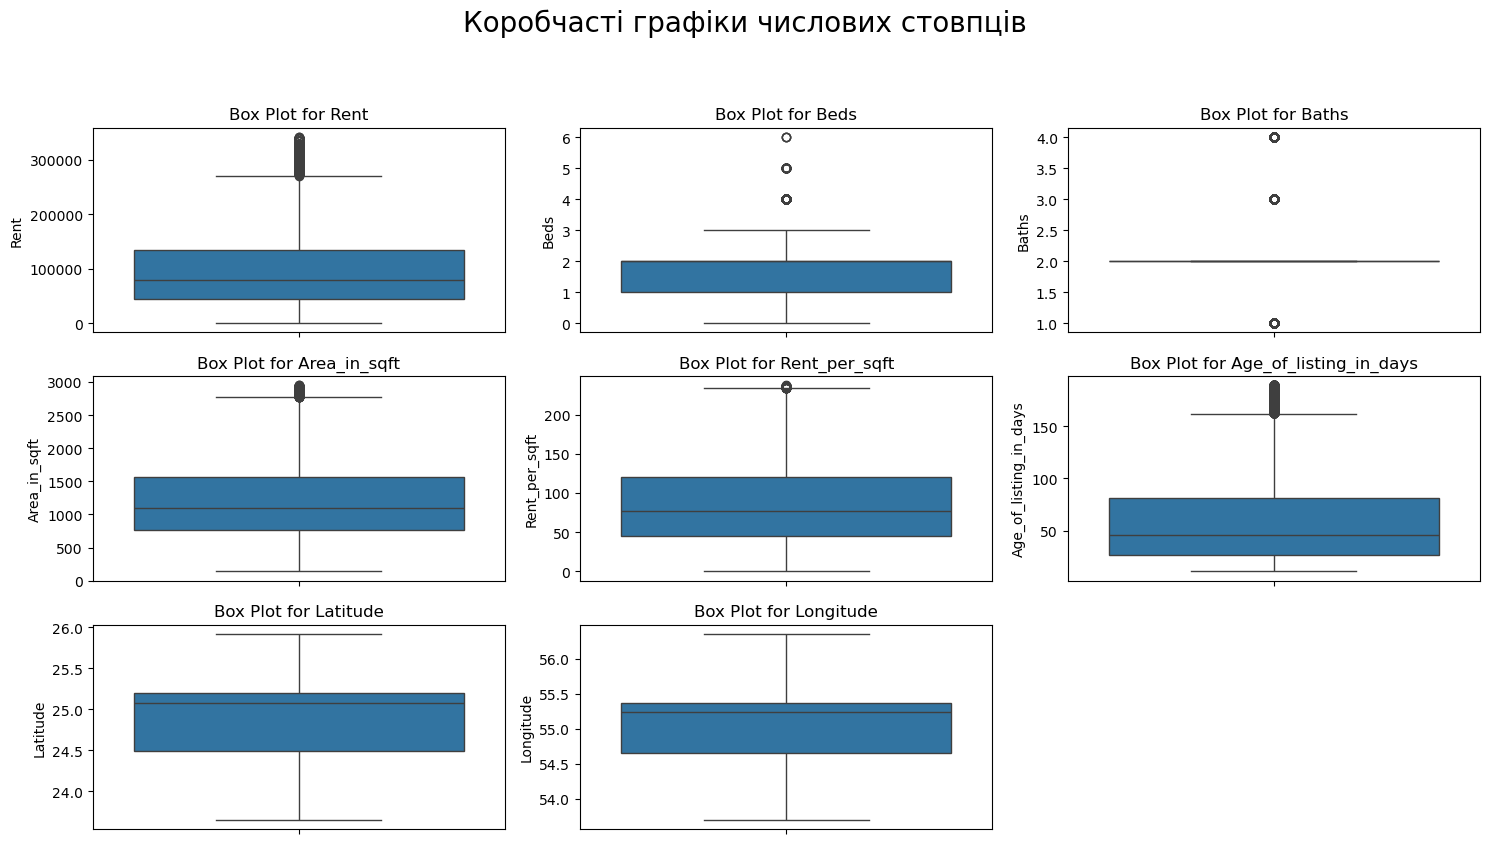

In [748]:
plot_boxplot(data, numerical_columns)

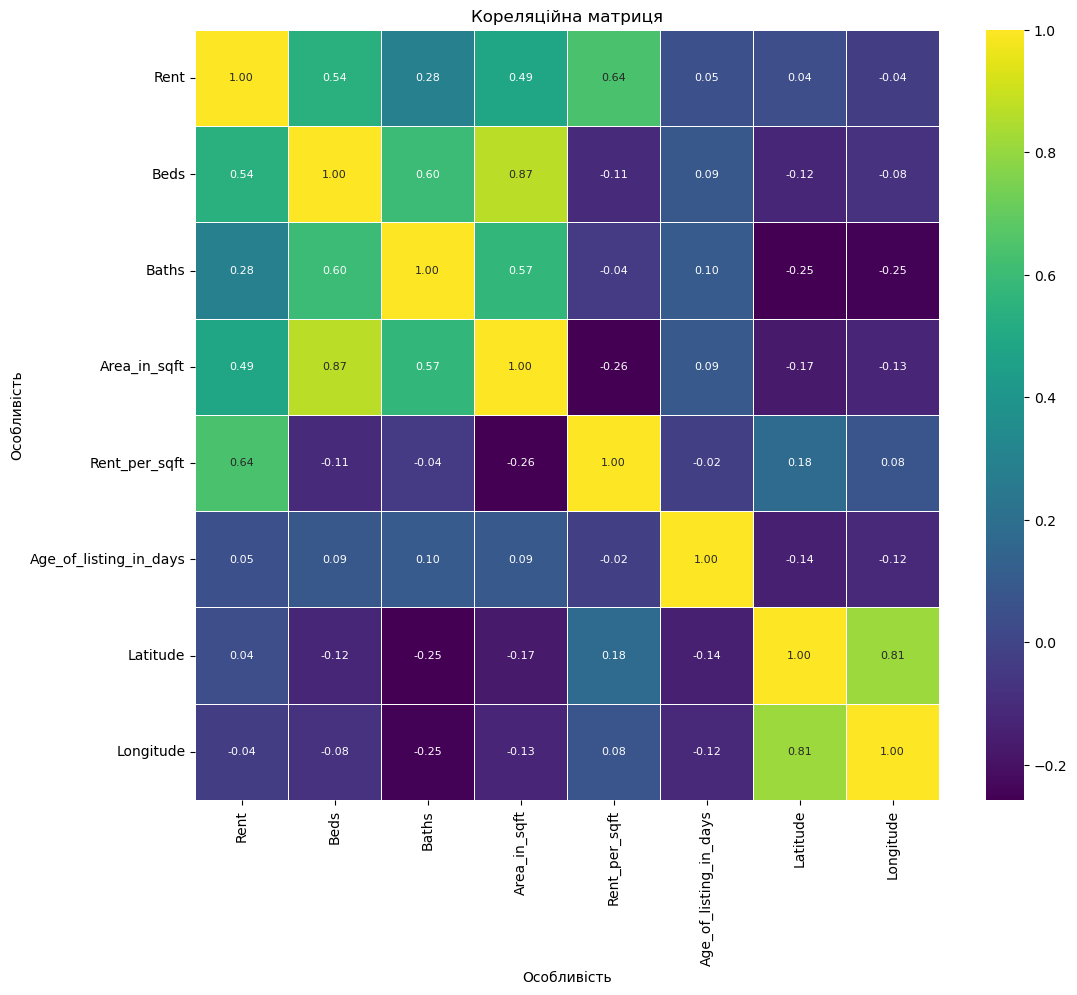

In [749]:
plot_corr_matrix(data, numerical_columns)

In [750]:
data.to_csv('dubai_properties_processed.csv', index=False) # Збереження даних після опрацювання

In [751]:
# Кодування категоріальних стовпців
map_dicts = dict()
for column in special_categorical_columns:
    data[column] = data[column].astype('category')
    map_dicts[column] = dict(zip(data[column], data[column].cat.codes))
    data[column] = data[column].cat.codes

In [752]:
data.info() # Перегляд даних після опрацювання

<class 'pandas.core.frame.DataFrame'>
Index: 53720 entries, 0 to 73741
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rent                    53720 non-null  int64  
 1   Beds                    53720 non-null  int64  
 2   Baths                   53720 non-null  int64  
 3   Type                    53720 non-null  int8   
 4   Area_in_sqft            53720 non-null  int64  
 5   Rent_per_sqft           53720 non-null  float64
 6   Rent_category           53720 non-null  int8   
 7   Furnishing              53720 non-null  int8   
 8   Age_of_listing_in_days  53720 non-null  int64  
 9   City                    53720 non-null  int8   
 10  Latitude                53720 non-null  float64
 11  Longitude               53720 non-null  float64
dtypes: float64(3), int64(5), int8(4)
memory usage: 3.9 MB


In [753]:
data.head() # Перегляд 3 записів після опрацювання

,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Furnishing,Age_of_listing_in_days,City,Latitude,Longitude
0,124000,3,4,0,1785,69.467787,2,1,45,0,24.493598,54.407841
1,140000,3,4,0,1422,98.452883,2,1,44,0,24.494022,54.607372
2,99000,2,3,0,1314,75.342466,2,0,31,0,24.485931,54.600939
5,75000,1,1,0,706,106.232295,2,0,131,0,24.493598,54.407841
6,65000,1,1,0,698,93.123209,1,1,41,0,24.494022,54.607372


In [754]:
data.to_csv('dubai_properties_processed_encoded.csv', index=False) # Збереження закодованих даних після опрацювання

# Поділ датасету на тренувальний і тестові набори
- Я поділив у відношенні тренувальні та тестові наборі у відношенні 80:20

In [756]:
X = data.drop("Rent", axis=1)
y = data["Rent"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Вибір метрик оцінювання
- MAE (Mean Absolute Error) - це середнє абсолютне значення різниці між прогнозом і фактичним значенням. Чим менше значення MAE, тим менша середня помилка моделі, а отже, точніші прогнози.
- MSE (Mean Squared Error) - це середнє значення квадратів різниці між прогнозом і фактичним значенням. Менше значення MSE свідчить про кращу точність моделі, але метрика є чутливою до великих помилок.
- RMSE (Root Mean Squared Error) - це корінь з MSE, що дозволяє повернути помилку у вихідні одиниці цільової змінної. Чим менше значення RMSE, тим точніше модель, але, як і MSE, RMSE чутлива до великих помилок.

In [758]:
# Метрика оцінки MAE, MSE, RMSE
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    return mae, mse, rmse

# Вибір моделей та вибір найкращої моделі
Було обрано Linear Regression, Random Forest, Gradient Boosting для регресії.
- Linear Regression (Лінійна регресія):
- - Лінійна регресія намагається знайти пряму лінію, яка найкраще описує залежність між вхідними ознаками (фічами) та цільовою змінною.
  - Вона мінімізує середньоквадратичну помилку (різницю між передбаченими і фактичними значеннями).
  - Підходить для задач, де між ознаками та цільовою змінною існує лінійна залежність.
 - Random Forest (Випадковий ліс):
 -  - Random Forest складається з багатьох дерев рішень, кожне з яких навчається на різних випадкових підмножинах даних.
    - Для передбачення модель обчислює середнє значення результатів усіх дерев.
    - Завдяки ансамблевому підходу зменшується ризик перенавчання і підвищується точність, особливо на нерівномірних або складних даних.
- Gradient Boosting (Градієнтний бустинг):-
- - Gradient Boosting будує послідовність дерев, кожне з яких намагається виправити помилки попереднього.
  - Кожне наступне дерево навчається на залишках (помилках), які зробило попереднє дерево.
  - Цей процес продовжується, поки не досягнеться задана кількість дерев або модель не досягне задовільної точності. Gradient Boosting добре працює на складних даних, але може бути схильний до перенавчання на малих наборах даних.
 
Результати оцінювання:

- Linear Regression має високе значення MAE, MSE та RMSE, що свідчить про погану точність моделі.
- Random Forest має найнижчі значення всіх метрик, зокрема MAE та RMSE, що вказує на найкращу точність.
- Gradient Boosting показує середні результати, але має значну різницю між MSE та MAE.

In [760]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=25, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae, mse, rmse = evaluate_model(y_test, y_pred)
    print(f"{name}:")
    print(f"\tMAE: {mae}")
    print(f"\tMSE: {mse}")
    print(f"\tRMSE: {rmse}")

Linear Regression:
	MAE: 15676.64068146672
	MSE: 434322387.5191207
	RMSE: 20840.402767679916
Random Forest:
	MAE: 419.2518168279969
	MSE: 845269.496485182
	RMSE: 919.3853906198325
Gradient Boosting:
	MAE: 5906.064661201734
	MSE: 57710329.22156248
	RMSE: 7596.731482786691


# Підбір гіперпараметрів
Random Forest має найнижчі значення всіх метрик, зокрема MAE та RMSE, що вказує на найкращу точність.

Буде використовуватись метод RandomizedSearchCV. Алгоритм його роботи такий:
- випадковий вибір - він випадково вибирає комбінації гіперпараметрів з набору можливих значень, що визначаються словником параметрів.
- крос-валідація - кожна вибрана комбінація перевіряється за допомогою крос-валідації, щоб оцінити продуктивність моделі на різних підмножинах даних.
- оцінка кращої моделі - після кількох ітерацій RandomizedSearchCV повертає комбінацію параметрів, яка дала найкращий результат


Будуть використовуватись такі гіперпараметри (обрав за допомогою ресурсу geeksforgeeks):

- 'n_estimators' - кількість дерев у лісі: розглядаємо варіанти з 100 та 200 деревами
- 'max_depth' - максимальна глибина дерев: без обмежень, 20 рівнів або 30 рівнів
- 'min_samples_split' - мінімальна кількість зразків для розбиття вузла: 2 або 5
- 'min_samples_leaf' - мінімальна кількість зразків для утворення листа: 1 або 2

In [762]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Налаштування гіперпараметрів
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor()

# Оптимізація гіперпараметрів
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=5, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

y_pred = random_search.best_estimator_.predict(X_test)

mae, mse, rmse = evaluate_model(y_test, y_pred)
print(f"Random Forest:")
print(f"\tMAE: {mae}")
print(f"\tMSE: {mse}")
print(f"\tRMSE: {rmse}")

print(random_search.best_params_)

Random Forest:
	MAE: 369.5918435074967
	MSE: 692239.5575582875
	RMSE: 832.0093494416319
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}


# Аналіз важливості ознак

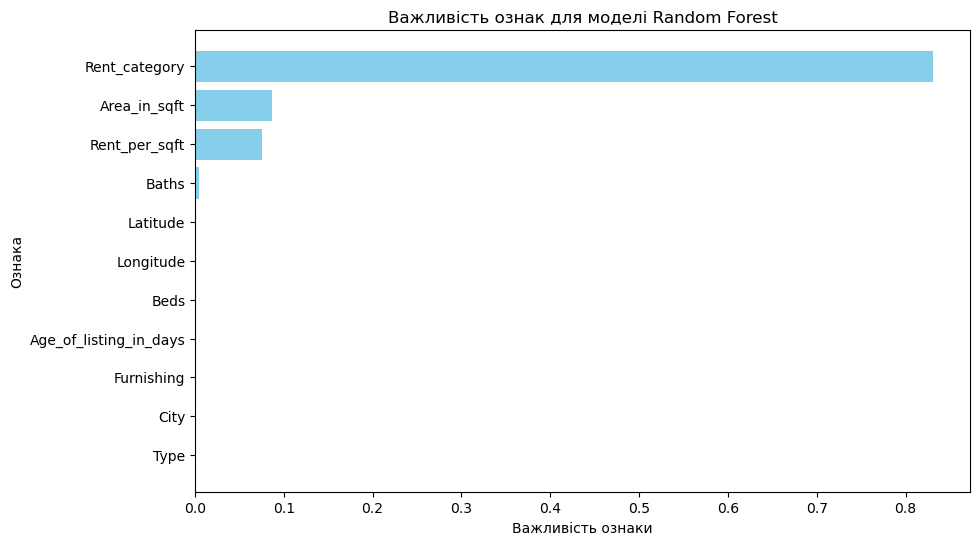

In [764]:
best_model = random_search.best_estimator_

feature_importances = best_model.feature_importances_

feature_names = X_train.columns 

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Важливість ознаки')
plt.ylabel('Ознака')
plt.title('Важливість ознак для моделі Random Forest')
plt.gca().invert_yaxis()
plt.show()

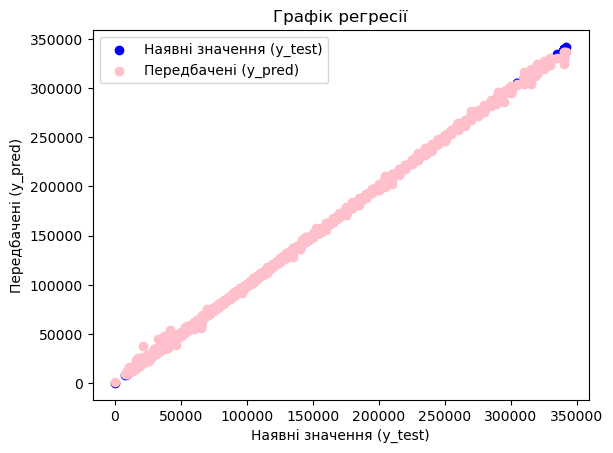

In [765]:
plt.scatter(y_test, y_test, color='blue', label='Наявні значення (y_test)')
plt.scatter(y_test, y_pred, color='pink', label='Передбачені (y_pred)')

plt.xlabel("Наявні значення (y_test)")
plt.ylabel("Передбачені (y_pred)")
plt.title("Графік регресії")
plt.legend()

plt.show()

# Висновки
- Написання скриптів було зроблено відповідно до останнього пункту в середовищі PyCharm.
- Кожні досягнення було описано на початку кожного розділу (відповідно до ходу виконання роботи РГР). Порівняння моделей також.
- Найбільш важким етапом був підбір гіперпараметрів, оскільки, є великий об'єм даних, що займало багато часу під час оптимізації та подальшого виводу результату.
- Враженні такі як і на практичні роботи, але замість класифікації - регресія.
- На практичних роботах, я навчився:
- - ПР 1 - визначати бізнес-цілі та цілі моделювання. Формувати критерії успіху до них. Також, зробив аналіз даних для свого варіанту.
  - ПР 2 - я обробляв дані, а саме відсутні дані, кодував та їх масштабував.
  - ПР 3 - проводив для моделей тренування та валідацію. Обрав ще метрики оцінки результатів.
  - ПР 4 - проводив налаштування моделі (вибір та оптимізація гіперпараметрів) та була робота з незбалансованими класами.
  - ПР 5 - створювати ML-проект.